<a href="https://colab.research.google.com/github/chilakalavyshnavi/Stegnography/blob/main/StegnoRGBImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import cv2 #opencv image
import numpy as np #array
import string
import os
import matplotlib.pyplot as plt

In [ ]:
#ASCII CONVERSION
d={chr(i):i for i in range(255)} #character to ascii
c={i:chr(i) for i in range(255)} #ascii to character

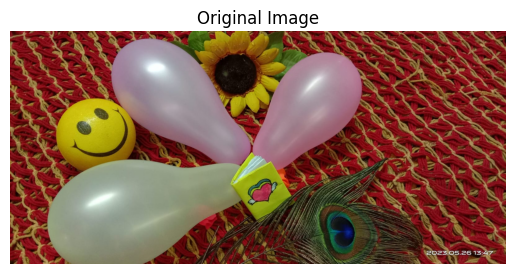

Image Shape (Height, Width, Channels): (750, 1600, 3)


In [ ]:
#load the image
image_path=r"/content/aesthetic lockscreen.jpg"
x=cv2.imread(image_path) #convertion of image to numerical array in 2D matrix

#convert to rgb for matplotlib visualization
x_rgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB) #optional

#show the original image
plt.imshow(x_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

#display the image shape
print("Image Shape (Height, Width, Channels):",x.shape)

In [ ]:
key="123" #example key
text="secret" #message to hide

print("Key:",key)
print("Message:",text)

Key: 123
Message: secret


In [ ]:
#show ASCII Values of text and key
text_ascii=[d[ch] for ch in text]   #list of ascii values of text characters
key_ascii=[d[ch] for ch in key]     #list of ascii values of key
print("Text_ASCII:",text_ascii)
print("Key_ASCII:" ,key_ascii)

Text_ASCII: [115, 101, 99, 114, 101, 116]
Key_ASCII: [49, 50, 51]


In [ ]:
#make a copy of image to modify
x_enc=x.copy()
n=0 #no of rows
m=0 #no of columns
z=0 #colour panel
l=len(text) #6
kl=0

#encrypt and modify pixel values
for i in range(l):
  orig_val=x_enc[n,m,z]
  new_val=d[text[i]]^d[key[kl]]
  x_enc[n,m,z]=new_val
  print(f"Embedding '[text{i}]' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original={orig_val}]")

  n=n+1
  m=m+1
  z=(z+1)%3
  m=(m+1)%3
  kl=(kl+1)%len(key)

Embedding '[text0]' (ASCII 115) XOR '1' (ASCII 49) = 66 at pixel (0,0,0) [original=29]
Embedding '[text1]' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (1,2,1) [original=18]
Embedding '[text2]' (ASCII 99) XOR '3' (ASCII 51) = 80 at pixel (2,1,2) [original=132]
Embedding '[text3]' (ASCII 114) XOR '1' (ASCII 49) = 67 at pixel (3,0,0) [original=29]
Embedding '[text4]' (ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (4,2,1) [original=23]
Embedding '[text5]' (ASCII 116) XOR '3' (ASCII 51) = 71 at pixel (5,1,2) [original=121]


In [ ]:
#save encrypted image
cv2.imwrite("encrypt.jpg",x_enc)

True

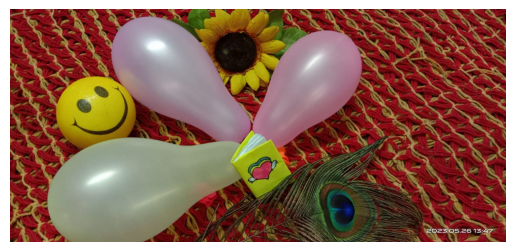

In [ ]:
#show encrypted image
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
#decrypt
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
  val=x_enc[n,m,z]
  orig_char=c[val^d[key[kl]]]  #new encrypted xor ascii(key)
  decrypt +=orig_char

  print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} -> '{orig_char}'")

  n=n+1
  m=m+1
  m=(m+1)%3
  z=(z+1)%3
  kl=(kl+1)%len(key)
print("Decrypted text:",decrypt)

Decrypting pixel (0,0,0): 66 XOR 49 -> 's'
Decrypting pixel (1,2,1): 87 XOR 50 -> 'e'
Decrypting pixel (2,1,2): 80 XOR 51 -> 'c'
Decrypting pixel (3,0,0): 67 XOR 49 -> 'r'
Decrypting pixel (4,2,1): 87 XOR 50 -> 'e'
Decrypting pixel (5,1,2): 71 XOR 51 -> 't'
Decrypted text: secret
